## Data loading

### Subtask:
Load the Vancouver and Toronto crime datasets.

**Reasoning**:
Import pandas and load the two datasets into pandas DataFrames, then display the first 5 rows of each to verify.


In [31]:
import pandas as pd  

# Load Vancouver and Toronto crime data from CSV files into DataFrames
df_vancouver = pd.read_csv('VancouverFinal.csv')
df_toronto   = pd.read_csv('Toronto.csv')

# As the dataset is huge so we are displaying the first 5 rows of each DataFrame
display(df_vancouver.head())
display(df_toronto.head())


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06


,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.306754,43.734654,-8.828387e+06,5.424471e+06
1,2,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.455770,43.677775,-8.844976e+06,5.415712e+06
2,3,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.406223,43.727681,-8.839460e+06,5.423396e+06
3,4,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946,-8.840503e+06,5.412199e+06
4,5,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.390786,43.649125,-8.837742e+06,5.411303e+06


# ## Data cleaning

### Subtask:
Clean the Vancouver and Toronto crime datasets.

**Reasoning**:
Filter the dataframes by date (2020-2024), handle missing values, remove duplicates, and ensure correct data types.  .


In [32]:
import pandas as pd

df_toronto = pd.read_csv('Toronto.csv')

print("Cleaning and filtering Toronto dataset: ")

df_toronto['OCC_DATE'] = pd.to_datetime(df_toronto['OCC_DATE'])
df_toronto = df_toronto[(df_toronto['OCC_DATE'].dt.year >= 2020) & (df_toronto['OCC_DATE'].dt.year <= 2024)]
df_toronto['Date'] = df_toronto['OCC_DATE'].dt.date
df_toronto['Time'] = df_toronto['OCC_DATE'].dt.time
df_toronto['Year'] = df_toronto['OCC_DATE'].dt.year

df_toronto = df_toronto[['Date', 'Time', 'Year', 'DIVISION', 'NEIGHBOURHOOD_158', 'OFFENCE', 'MCI_CATEGORY', 
                         'LAT_WGS84', 'LONG_WGS84']]
cols = df_toronto.columns.tolist()

cols[cols.index('DIVISION')] = 'Division'
cols[cols.index('NEIGHBOURHOOD_158')] = 'Neighbourhood'
cols[cols.index('OFFENCE')] = 'Offence'
cols[cols.index('MCI_CATEGORY')] = 'Category'
cols[cols.index('LAT_WGS84')] = 'Latitude'
cols[cols.index('LONG_WGS84')] = 'Longitude'
df_toronto.columns = cols

df_toronto = df_toronto.dropna()
df_toronto = df_toronto.drop_duplicates()
df_toronto.index.name = 'Index'

toronto_main = df_toronto[['Date', 'Time', 'Year', 'Division', 'Neighbourhood', 'Offence', 'Category']]
toronto_location = df_toronto[['Latitude', 'Longitude']]

print("\nFirst 10 rows of Toronto's Crime :\n")
print(toronto_main.head(10).to_string())

print("\nDisplaying Location - (Latitude and Longitude):\n")
print(toronto_location.head(10).to_string())


df_vancouver = pd.read_csv('VancouverFinal.csv')
print("Cleaning and filtering Vancouver dataset:")

df_vancouver['DATE'] = pd.to_datetime(df_vancouver[['YEAR', 'MONTH', 'DAY']])
df_vancouver = df_vancouver[(df_vancouver['DATE'].dt.year >= 2020) & (df_vancouver['DATE'].dt.year <= 2024)]

df_vancouver = df_vancouver.dropna(subset=['DATE', 'TYPE', 'NEIGHBOURHOOD'])
df_vancouver = df_vancouver.drop_duplicates()
df_vancouver.index.name = 'Index'
df_vancouver['YEAR'] = df_vancouver['YEAR'].astype(int)
df_vancouver['HOUR'] = df_vancouver['HOUR'].astype(int)

vancouver_main = df_vancouver[['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD',
                               'DATE']]
vancouver_location = df_vancouver[['X', 'Y']]


df_toronto['city'] = 'Toronto'
df_vancouver['city'] = 'Vancouver'

df_toronto.rename(columns={
    'MCI_CATEGORY': 'Category',
    'NEIGHBOURHOOD_158': 'Neighbourhood',
    'YEAR': 'Year'
}, inplace=True)

df_vancouver.rename(columns={
    'TYPE': 'Category',
    'NEIGHBOURHOOD': 'Neighbourhood',
    'YEAR': 'Year'
}, inplace=True)

common_columns = ['Category', 'Year', 'Neighbourhood', 'city']
df_toronto_selected = df_toronto[common_columns]
df_vancouver_selected = df_vancouver[common_columns]

df_combined = pd.concat([df_toronto_selected, df_vancouver_selected], ignore_index=True)



print("\nFirst 10 rows of Vancouver's Crime:\n")
print(vancouver_main.head(10).to_string())
print("\nDisplaying location - (X and Y):\n")
print(vancouver_location.head(10).to_string())


Cleaning and filtering Toronto dataset: 

First 10 rows of Toronto's Crime :

              Date      Time  Year Division                         Neighbourhood                       Offence         Category
Index                                                                                                                           
211487  2020-01-01  05:00:00  2020      D41                   Eglinton East (138)                       Assault          Assault
211488  2020-01-01  05:00:00  2020      D43                     Morningside (135)  Unlawfully In Dwelling-House  Break and Enter
211489  2020-01-01  05:00:00  2020      D23                   Rexdale-Kipling (4)                       Assault          Assault
211490  2020-01-01  05:00:00  2020      D51  Cabbagetown-South St.James Town (71)           Assault With Weapon          Assault
211491  2020-01-01  05:00:00  2020      D11     Runnymede-Bloor West Village (89)                           B&E  Break and Enter
211493  2020-01-01 

# ## Data wrangling

### Subtask:
Combine the cleaned Vancouver and Toronto datasets into a single DataFrame, add a city identifier(Toronto & Vancouver, and standardize crime categories.


**Reasoning**:
Combine the two dataframes, add a city identifier column


In [33]:
# Data Wrangling
df_toronto['city'] = 'Toronto'
df_vancouver['city'] = 'Vancouver'

# Modify specific columns names to improve readability
vancouver_columns = df_vancouver.columns.tolist()
if 'TYPE' in vancouver_columns:
    vancouver_columns[vancouver_columns.index('TYPE')] = 'Category'

if 'NEIGHBOURHOOD' in vancouver_columns:
    vancouver_columns[vancouver_columns.index('NEIGHBOURHOOD')] = 'Neighbourhood'

if 'YEAR' in vancouver_columns:
    vancouver_columns[vancouver_columns.index('YEAR')] = 'Year'

df_vancouver.columns = vancouver_columns

# Modify specific columns names to improve readability
toronto_columns = df_toronto.columns.tolist()
if 'MCI_CATEGORY' in toronto_columns:
    toronto_columns[toronto_columns.index('MCI_CATEGORY')] = 'Category'

if 'NEIGHBOURHOOD_158' in toronto_columns:
    toronto_columns[toronto_columns.index('NEIGHBOURHOOD_158')] = 'Neighbourhood'

if 'YEAR' in toronto_columns:
    toronto_columns[toronto_columns.index('YEAR')] = 'Year'

df_toronto.columns = toronto_columns
common_columns = ['Category', 'Year', 'Neighbourhood', 'city']

df_toronto_selected = df_toronto[common_columns]
df_vancouver_selected = df_vancouver[common_columns]

# Combining the Two Datasets
df_combined = pd.concat([df_toronto_selected, df_vancouver_selected])

print("\nToronto Data:")
print(df_toronto_selected.head())

print("\nVancouver Data:")
print(df_vancouver_selected.head())

print("\n Record Counts by City:")
print(df_combined['city'].value_counts())



Toronto Data:
               Category  Year                         Neighbourhood     city
Index                                                                       
211487          Assault  2020                   Eglinton East (138)  Toronto
211488  Break and Enter  2020                     Morningside (135)  Toronto
211489          Assault  2020                   Rexdale-Kipling (4)  Toronto
211490          Assault  2020  Cabbagetown-South St.James Town (71)  Toronto
211491  Break and Enter  2020     Runnymede-Bloor West Village (89)  Toronto

Vancouver Data:
                         Category  Year Neighbourhood       city
Index                                                           
3      Break and Enter Commercial  2021      West End  Vancouver
5      Break and Enter Commercial  2020      West End  Vancouver
6      Break and Enter Commercial  2021      West End  Vancouver
7      Break and Enter Commercial  2022      West End  Vancouver
14     Break and Enter Commercial  2022

# Standardize and Group Crime Types


**Reasoning**:
1. Crime data collected from different cities, such as Toronto and Vancouver, often use varying labels and naming conventions for similar types of incidents. For instance, one dataset might label a crime as "Break and Enter Residential/Other", while another might use "B&E". These inconsistencies can make it difficult to conduct reliable, comparative analysis across cities or categories.

2. To address this, we use  dataframe mapping that standardizes diverse crime labels into broader categories such as "Violent Crime", "Property Crime", or "Traffic Incident". This mapping enables more consistent grouping and summary of crimes across both datasets, improving clarity and analytical quality.

In [34]:
#Crime Category Standardization

# We created a dictionary to map detailed crime categories
# This helps simplify analysis by grouping similar crimes together (e.g., all thefts as 'Property Crime').
crime_mapping = {
    'Assault': 'Violent Crime',
    'Homicide': 'Violent Crime',
    'Robbery': 'Violent Crime',
    'Offence Against a Person': 'Violent Crime',
    'Auto Theft': 'Property Crime',
    'Theft of Vehicle': 'Property Crime',
    'Theft from Vehicle': 'Property Crime',
    'Theft Over': 'Property Crime',
    'Theft of Bicycle': 'Property Crime',
    'Other Theft': 'Property Crime',
    'Break and Enter': 'Property Crime',
    'Break and Enter Commercial': 'Property Crime',
    'Break and Enter Residential/Other': 'Property Crime',
    'Mischief': 'Other Crime',
    'Vehicle Collision or Pedestrian Struck (with Injury)': 'Traffic Incident',
    'Vehicle Collision or Pedestrian Struck (with Fatality)': 'Traffic Incident'
}

# Apply the mapping to the 'Category' column to create a new column: 'standard_crime'
df_combined['standard_crime'] = df_combined['Category'].map(crime_mapping)
print("\nSample standardized crime categories:")
print(df_combined[['Category', 'standard_crime']].dropna().drop_duplicates())



Sample standardized crime categories:
                                                 Category    standard_crime
Index                                                                      
211487                                            Assault     Violent Crime
211488                                    Break and Enter    Property Crime
211493                                            Robbery     Violent Crime
211499                                         Auto Theft    Property Crime
211673                                         Theft Over    Property Crime
3                              Break and Enter Commercial    Property Crime
49666                   Break and Enter Residential/Other    Property Crime
123490                                           Homicide     Violent Crime
123817                                           Mischief       Other Crime
238505                           Offence Against a Person     Violent Crime
320385                                        Oth

# Data Plotting

### Subtask:
Explore the combined crime dataset to understand the distribution of crime types, calculate  statistics, and explore its correlations.


Crime Type Counts:
Property Crime      199090
Violent Crime       118891
Other Crime          29043
Traffic Incident      5228
Name: standard_crime, dtype: int64


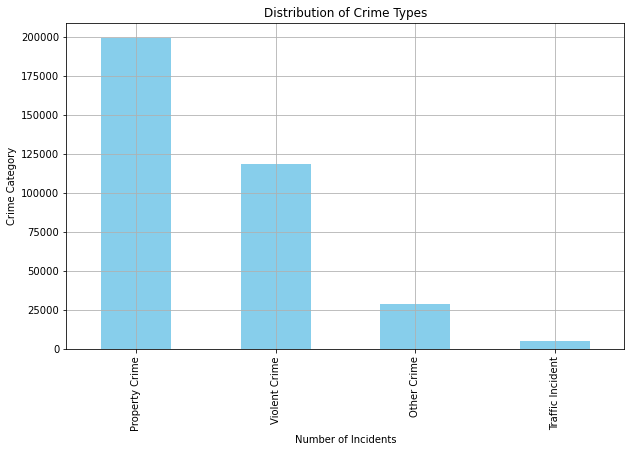

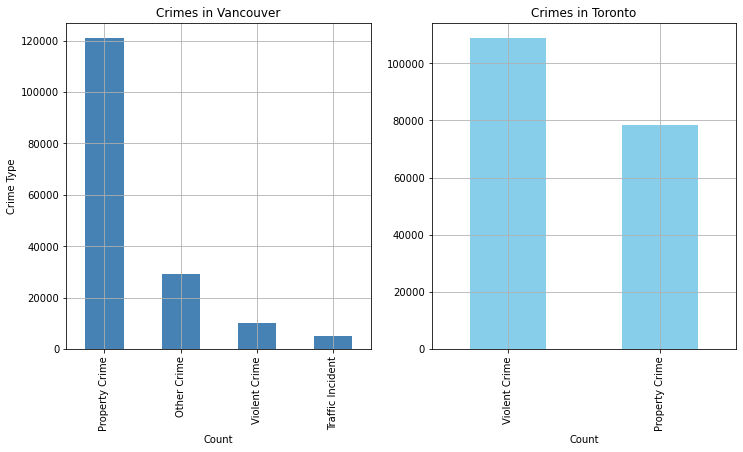

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Data Exploration of Crime Categories

# 1. Distribution of crime types
standard_crime_counts = df_combined['standard_crime'].value_counts()

print("Crime Type Counts:")
print(standard_crime_counts)

# Visualize the distribution using a vertical bar chart
plt.figure(figsize=(10, 6))
standard_crime_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crime Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Category')
plt.grid(True)
plt.show()

# Crime type comparison by city
vancouver_standard = df_combined[df_combined['city'] == 'Vancouver']['standard_crime'].value_counts()
toronto_standard = df_combined[df_combined['city'] == 'Toronto']['standard_crime'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
vancouver_standard.plot(kind='bar', color='steelblue')
plt.title('Crimes in Vancouver')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.grid(True)

plt.subplot(1, 2, 2)
toronto_standard.plot(kind='bar', color='skyblue')
plt.title('Crimes in Toronto')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(True)

plt.show()


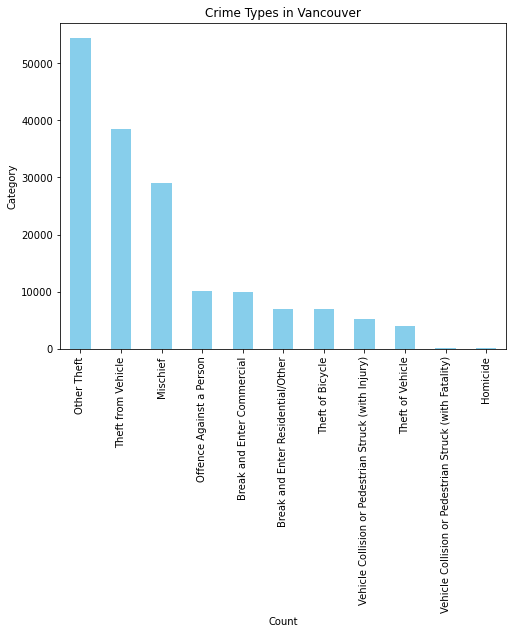

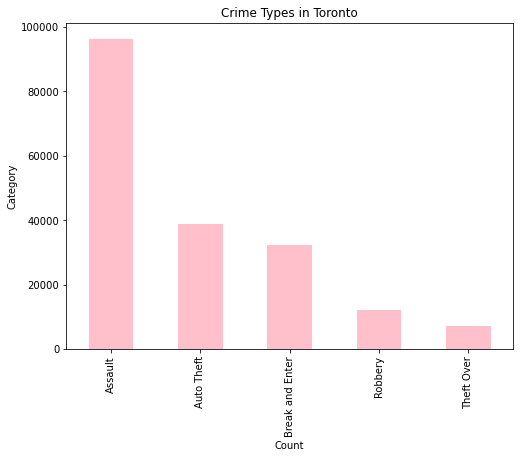

In [37]:
import matplotlib.pyplot as plt

# Count of raw crime types by city
vancouver_counts = df_combined[df_combined['city'] == 'Vancouver']['Category'].value_counts()
toronto_counts = df_combined[df_combined['city'] == 'Toronto']['Category'].value_counts()

# Vancouver
plt.figure(figsize=(8, 6))
vancouver_counts.plot(kind='bar', color='skyblue')
plt.title('Crime Types in Vancouver')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Toronto
plt.figure(figsize=(8, 6))
toronto_counts.plot(kind='bar', color='pink')
plt.title('Crime Types in Toronto')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Crime Count Summary By City and Year
1. Provides a detailed breakdown of crime types in Toronto and Vancouver (2020–2024)
2. Groups data by both city and year to observe  trends
3. Enables comparison of crime frequencies between the two cities
4. Supports analysis of which crimes are increasing or decreasing over time
5. Lays the foundation for further visualizations and insights
6. Useful for identifying high-risk periods or areas for specific crime types


In [7]:
# Group by city, year, and category to get count of each crime type
grouped_counts = df_combined.groupby(['city', 'Year', 'Category']).size()
grouped = grouped_counts.reset_index(name='count')

top_crimes = df_combined['Category'].value_counts().head().index.tolist()
filtered_grouped = grouped[grouped['Category'].isin(top_crimes)]

summary_table = filtered_grouped.pivot(index=['city', 'Year'], columns='Category', values='count').fillna(0)
summary_table = summary_table.reset_index()
print("\nCrime Counts for Top Crime Types by City and Year:")
print(summary_table)



Crime Counts for Top Crime Types by City and Year:
Category       city  Year  Assault  Auto Theft  Break and Enter  Other Theft  \
0           Toronto  2020  16600.0      5113.0           6749.0          0.0   
1           Toronto  2021  17317.0      5880.0           5530.0          0.0   
2           Toronto  2022  19209.0      8594.0           5910.0          0.0   
3           Toronto  2023  21703.0     10841.0           7454.0          0.0   
4           Toronto  2024  21597.0      8317.0           6592.0          0.0   
5         Vancouver  2020      0.0         0.0              0.0       8649.0   
6         Vancouver  2021      0.0         0.0              0.0       8583.0   
7         Vancouver  2022      0.0         0.0              0.0      10759.0   
8         Vancouver  2023      0.0         0.0              0.0      12831.0   
9         Vancouver  2024      0.0         0.0              0.0      13607.0   

Category  Theft from Vehicle  
0                        0.0  
1    

# Descriptive Statistics of Selected Crime Types in Toronto and Vancouver (2020–2024)
### Purpose of This Descriptive Analysis:
1. Summarizes key statistics for selected crime types across Toronto and Vancouver (2020–2024).
2. Focuses on high-priority categories that reflect both violent and property-related offenses.
3. Included crime types:
    - Theft-related crimes: Theft from Vehicle, Other Theft, Theft of Bicycle
    - Property crimes: Break and Enter (Commercial & Residential)
    - Offences against persons
    - Traffic incidents involving injury or fatality
    - Homicide and Mischief
4. Provides statistical: count, mean, standard deviation, min, max, and percentiles.




In [8]:
# Group by city, year, and crime type
grouped = df_combined.groupby(['city', 'Year', 'Category']).size()
grouped = grouped.reset_index(name='count')

summary_stats = grouped.pivot(index=['city', 'Year'], columns='Category', values='count').fillna(0)
summary_stats = summary_stats.reset_index()

stats_summary = summary_stats.drop(columns=['city', 'Year']).describe()

print("\nDescriptive Statistics of Crime Counts:")
print(stats_summary)



Descriptive Statistics of Crime Counts:
Category       Assault    Auto Theft  Break and Enter  \
count        10.000000     10.000000        10.000000   
mean       9642.600000   3874.500000      3223.500000   
std       10285.250715   4360.890231      3434.547657   
min           0.000000      0.000000         0.000000   
25%           0.000000      0.000000         0.000000   
50%        8300.000000   2556.500000      2765.000000   
75%       18736.000000   7707.750000      6421.500000   
max       21703.000000  10841.000000      7454.000000   

Category  Break and Enter Commercial  Break and Enter Residential/Other  \
count                      10.000000                          10.000000   
mean                     1000.600000                         700.800000   
std                      1112.014009                         790.748703   
min                         0.000000                           0.000000   
25%                         0.000000                           0.00000

# Data analysis
### Subtask:
Analyze crime trends over time, identify regions with higher/lower crime rates, compare crime rates between cities, and perform time series analysis.  Additionally, perform a cluster analysis to group similar crime types based on their temporal trends.


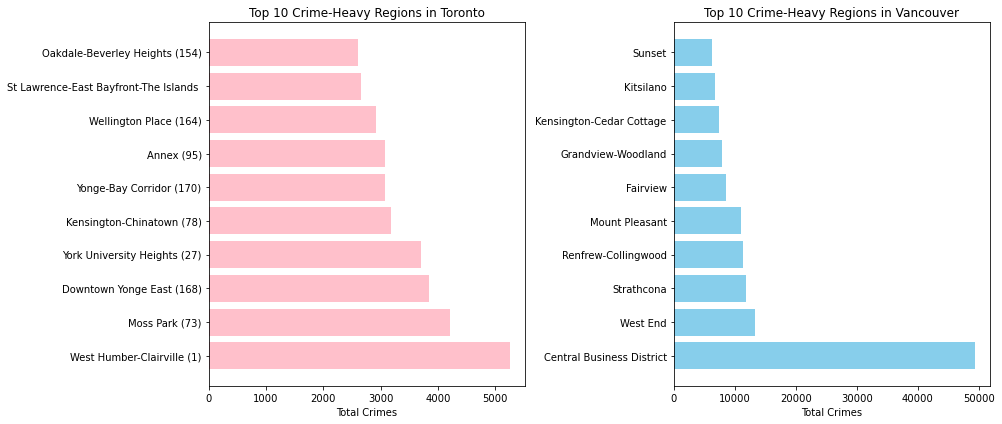

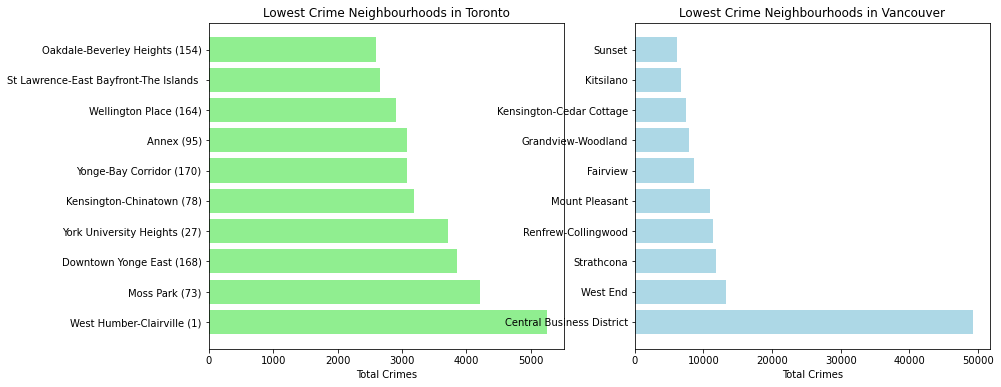

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by City and Region (Neighbourhood) to count total crimes
region_crime_counts = df_combined.groupby(['city', 'Neighbourhood']).size()
region_crime_counts = region_crime_counts.reset_index(name='crime_count')

region_crime_sorted = region_crime_counts.sort_values(by='crime_count', ascending=False)

# Showing the Top 10 Highest Crime Regions in Each City
top_regions_toronto = region_crime_sorted[region_crime_sorted['city'] == 'Toronto'].head(10)
top_regions_vancouver = region_crime_sorted[region_crime_sorted['city'] == 'Vancouver'].head(10)

plt.figure(figsize=(14, 6))

# Toronto
plt.subplot(1, 2, 1)
plt.barh(top_regions_toronto['Neighbourhood'], top_regions_toronto['crime_count'], color='pink')
plt.title('Top 10 Crime-Heavy Regions in Toronto')
plt.xlabel('Total Crimes')

# Vancouver
plt.subplot(1, 2, 2)
plt.barh(top_regions_vancouver['Neighbourhood'], top_regions_vancouver['crime_count'], color='skyblue')
plt.title('Top 10 Crime-Heavy Regions in Vancouver')
plt.xlabel('Total Crimes')

plt.tight_layout()
plt.show()


# Visualize Lowest Crime Regions
low_regions_toronto = region_crime_sorted[region_crime_sorted['city'] == 'Toronto'].head(10)
low_regions_vancouver = region_crime_sorted[region_crime_sorted['city'] == 'Vancouver'].head(10)


plt.figure(figsize=(14, 6))

# Toronto
plt.subplot(1, 2, 1)
plt.barh(low_regions_toronto['Neighbourhood'], low_regions_toronto['crime_count'], color='lightgreen')
plt.title('Lowest Crime Neighbourhoods in Toronto')
plt.xlabel('Total Crimes')


# Vancouver
plt.subplot(1, 2, 2)
plt.barh(low_regions_vancouver['Neighbourhood'], low_regions_vancouver['crime_count'], color='lightblue')
plt.title('Lowest Crime Neighbourhoods in Vancouver')
plt.xlabel('Total Crimes')

plt.show()


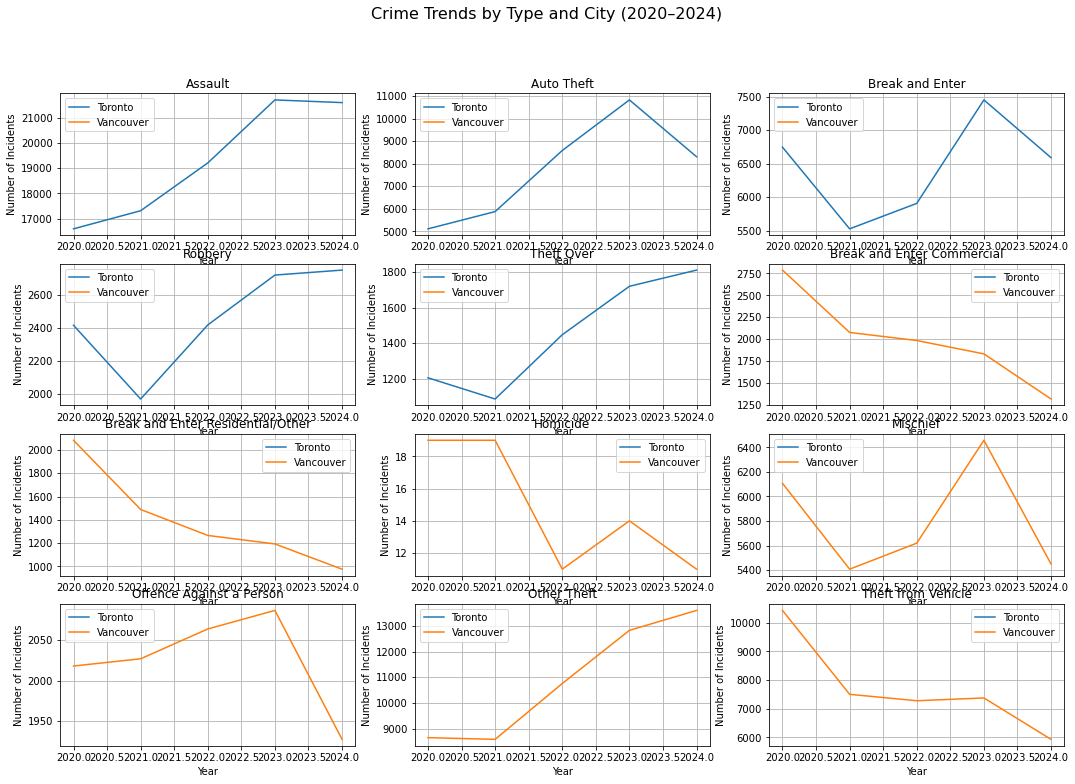

In [40]:
import matplotlib.pyplot as plt

grouped = df_combined.groupby(['Year', 'city', 'Category']).size()
crime_summary = grouped.reset_index(name='count')

crime_types = list(crime_summary['Category'])

fig, axes = plt.subplots(4, 3, figsize=(18, 12)) 
plot_index = 0 

for row in range(4):
    for col in range(3):
        if plot_index < len(crime_types):
            current_crime = crime_types[plot_index]
            chart = axes[row][col]

            for city in crime_summary['city'].unique():
                data = crime_summary[
                    (crime_summary['Category'] == current_crime) &
                    (crime_summary['city'] == city)]
                chart.plot(data['Year'], data['count'],  label=city)

            chart.set_title(current_crime)
            chart.set_xlabel("Year")
            chart.set_ylabel("Number of Incidents")
            chart.grid(True)
            chart.legend()
            plot_index += 1
        else:
            axes[row][col].axis('off')  
            
plt.suptitle("Crime Trends by Type and City (2020–2024)", fontsize=16)

plt.show()


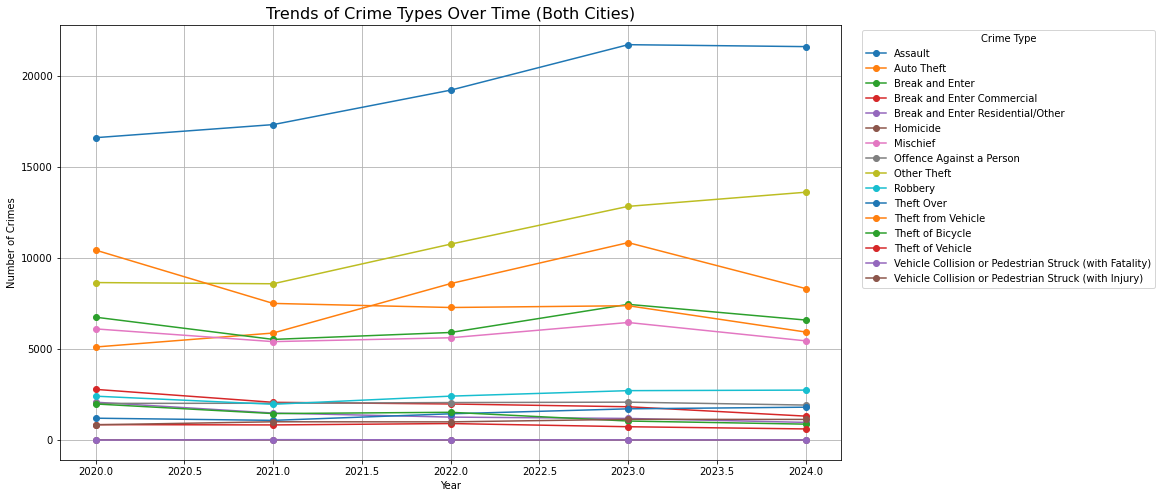

In [42]:
import matplotlib.pyplot as plt

trend_data = df_combined.groupby(['Year', 'Category']).size()
trend_data = trend_data.reset_index(name='count')

pivoted = trend_data.pivot(index='Year', columns='Category', values='count')
pivoted = pivoted.fillna(0)

pivoted.plot(figsize=(14, 8), marker='o')

plt.title("Trends of Crime Types Over Time (Both Cities)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.legend(title='Crime Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()



# Seasonal Crime analysis
### Subtask:
1. This section verifies whether any crimes occurred in Toronto during the Fall,spring ,summer,winter .
2. After combining both Toronto and Vancouver datasets and assigning seasons based on the month,
3. we filter the combined dataset for rows where:
 - city is 'Toronto'
 - season is 'Fall'
4. The result revealed that Toronto has 0 recorded crimes in Fall,

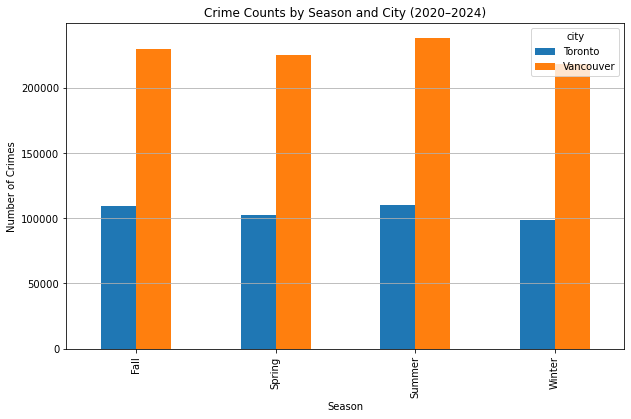

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_toronto = pd.read_csv("Toronto.csv")
df_vancouver = pd.read_csv("VancouverFinal.csv")

df_toronto['OCC_DATE'] = pd.to_datetime(df_toronto['OCC_DATE'])
df_toronto['Date'] = df_toronto['OCC_DATE'].dt.date
df_toronto['Month'] = df_toronto['OCC_DATE'].dt.month
df_toronto['city'] = 'Toronto'

df_vancouver['DATE'] = pd.to_datetime(df_vancouver[['YEAR', 'MONTH', 'DAY']])
df_vancouver['Month'] = df_vancouver['DATE'].dt.month
df_vancouver['city'] = 'Vancouver'

#Combining the dataset
df_combined = pd.concat([
    df_toronto[['Date', 'Month', 'city']],
    df_vancouver[['DATE', 'Month', 'city']].rename(columns={'DATE': 'Date'})])

def get_season(month):
    if pd.isna(month):
        return None
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

df_combined['Season'] = df_combined['Month'].apply(get_season)

season_city_group = df_combined.groupby(['city', 'Season']).size().reset_index(name='crime_count')
pivot_season = season_city_group.pivot(index='Season', columns='city', values='crime_count').fillna(0)

pivot_season.plot(kind='bar', figsize=(10, 6))
plt.title("Crime Counts by Season and City (2020–2024)")
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.grid(axis='y')
plt.show()


# Time of the day where the crime was most


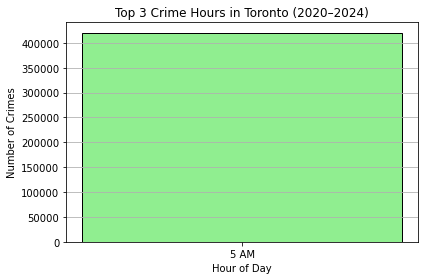

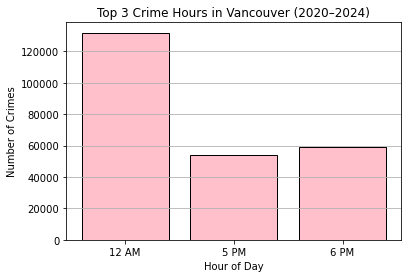

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

if 'OCC_DATE' in df_toronto.columns:
    df_toronto['OCC_DATE'] = pd.to_datetime(df_toronto['OCC_DATE'])
    df_toronto['Hour'] = df_toronto['OCC_DATE'].dt.hour
else:
    print("'OCC_DATE' not found in Toronto dataset.")

if 'HOUR' in df_vancouver.columns:
    df_vancouver['Hour'] = df_vancouver['HOUR']
else:
    print("'HOUR' column not found in Vancouver dataset.")

df_toronto['city'] = 'Toronto'
df_vancouver['city'] = 'Vancouver'

toronto_hour_data = df_toronto[['Hour', 'city']].dropna()
vancouver_hour_data = df_vancouver[['Hour', 'city']].dropna()
df_hourly = pd.concat([toronto_hour_data, vancouver_hour_data], ignore_index=True)


toronto_hour_counts = df_hourly[df_hourly['city'] == 'Toronto']['Hour'].value_counts()
top3_toronto = toronto_hour_counts.nlargest(3).sort_index()

toronto_labels = []
for hour in top3_toronto.index:
    if hour == 0:
        label = '12 AM'
    elif hour < 12:
        label = f'{hour} AM'
    elif hour == 12:
        label = '12 PM'
    else:
        label = f'{hour - 12} PM'
    toronto_labels.append(label)

plt.figure(figsize=(6, 4))
plt.bar(toronto_labels, top3_toronto.values, color='lightgreen', edgecolor='black')
plt.title("Top 3 Crime Hours in Toronto (2020–2024)", fontsize=12)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

vancouver_hour_counts = df_hourly[df_hourly['city'] == 'Vancouver']['Hour'].value_counts()
top3_vancouver = vancouver_hour_counts.nlargest(3).sort_index()

vancouver_labels = []
for hour in top3_vancouver.index:
    if hour == 0:
        label = '12 AM'
    elif hour < 12:
        label = f'{hour} AM'
    elif hour == 12:
        label = '12 PM'
    else:
        label = f'{hour - 12} PM'
    vancouver_labels.append(label)

plt.figure(figsize=(6, 4))
plt.bar(vancouver_labels, top3_vancouver.values, color='pink', edgecolor='black')
plt.title("Top 3 Crime Hours in Vancouver (2020–2024)", fontsize=12)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.grid(axis='y')
plt.show()


# Property Analysis

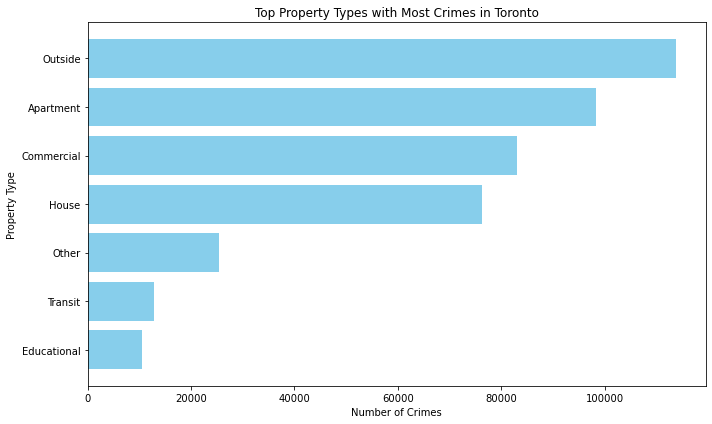

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df_toronto = pd.read_csv("Toronto.csv")

if 'PREMISES_TYPE' in df_toronto.columns:
    grouped_property = df_toronto.groupby('PREMISES_TYPE').size()
    toronto_property_crime = grouped_property.reset_index(name='crime_count')
    toronto_property_crime = toronto_property_crime.sort_values(by='crime_count', ascending=False)
    toronto_property_crime = toronto_property_crime.head(10)


    # Plotting Toronto property type crimes
    plt.figure(figsize=(10, 6))
    plt.barh(toronto_property_crime['PREMISES_TYPE'], toronto_property_crime['crime_count'], color='skyblue')
    plt.title("Top Property Types with Most Crimes in Toronto")
    plt.xlabel("Number of Crimes")
    plt.ylabel("Property Type")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print("The 'PREMISES_TYPE' column is not available in the Toronto dataset.")

# Socioeconomic factors 
### Subtask:
To explore whether high-crime and low-crime neighbourhoods in Toronto and Vancouver correlate with known socioeconomic conditions — particularly income levels, education, and population characteristics.
rom your cleaned and merged crime dataset (2020–2024), we grouped crime counts by city and neighbourhood.

Extracted:

   1.  Top 10 high-crime neighbourhoods per city.

   2. Top 10 low-crime neighbourhoods per city.

Visualized using horizontal bar charts, with city

For each neighbourhood, we researched publicly available data to understand its typical income, housing, population, and education profile.
We used  sources like:

    🔗 City of Toronto Neighbourhood Profiles (2021)

    🔗 City of Vancouver Community Profiles

    🔗 Statistics Canada Census 2021
    


### Crime vs Income & Education

| Neighbourhood           | City      | Crime Level | Income Level | Education Level | Notes                              |
|-------------------------|-----------|-------------|--------------|------------------|-------------------------------------|
| Downtown Yonge East     | Toronto   | High        | Low          | Medium           | Crowded, busy area, more crimes     |
| West End                | Vancouver | Very High   | Medium       | Medium           | Popular area, many people           |
| Kitsilano               | Vancouver | High        | High         | High             | Rich area but some crimes still     |
| Moss Park               | Toronto   | Very High   | Low          | Low              | Poor area, many crimes              |
| Cabbagetown             | Toronto   | High        | Medium       | Medium           | Changing area, mix of people        |
| Woodbine-Lumsden        | Toronto   | Low         | High         | High             | Quiet, safe, family area            |
| Kerrisdale              | Vancouver | Low         | Very High    | Very High        | Very rich, very safe                |
| West Point Grey         | Vancouver | Low         | High         | High             | Safe and rich neighborhood          |
| Bridle Path             | Toronto   | Very Low    | Very High    | Very High        | Super rich, very safe               |
| Leaside                 | Toronto   | Low         | High         | High             | Rich and peaceful area              |


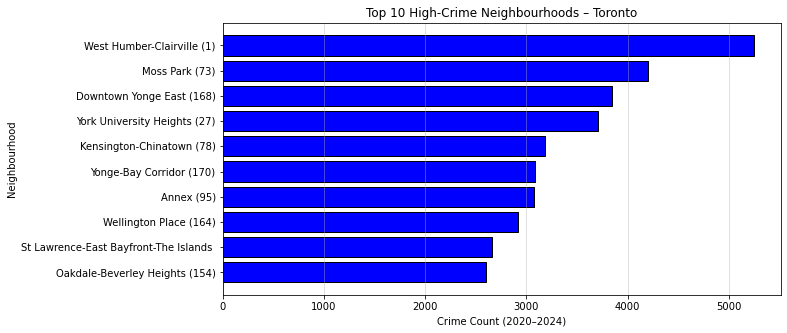

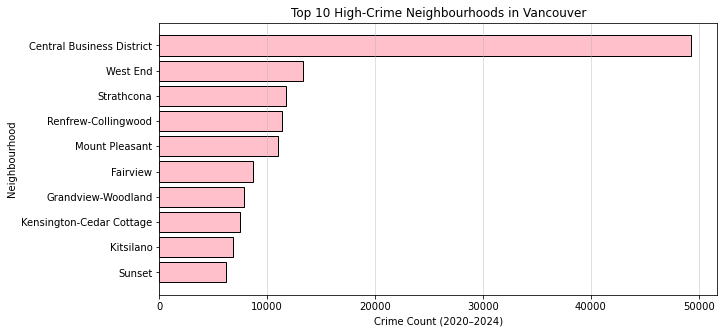

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df_combined.groupby(['city', 'Neighbourhood']).size()
crime_by_neigh = grouped.reset_index(name='Crime_Count')

sorted_crime = crime_by_neigh.sort_values(['city', 'Crime_Count'], ascending=[True, False])
neighbour = sorted_crime.groupby('city').head(10)

sorted_crime_bottom = crime_by_neigh.sort_values(['city', 'Crime_Count'], ascending=[True, True])
bottom_neigh = sorted_crime_bottom.groupby('city').head(10)

top_toronto = neighbour[neighbour['city'] == 'Toronto']
top_vancouver = neighbour[neighbour['city'] == 'Vancouver']
bottom_toronto = bottom_neigh[bottom_neigh['city'] == 'Toronto']
bottom_vancouver = bottom_neigh[bottom_neigh['city'] == 'Vancouver']

plt.figure(figsize=(10, 5))
plt.barh(top_toronto['Neighbourhood'], top_toronto['Crime_Count'], color='blue', edgecolor='black')
plt.title("Top 10 High-Crime Neighbourhoods – Toronto")
plt.xlabel("Crime Count (2020–2024)")
plt.ylabel("Neighbourhood")
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(top_vancouver['Neighbourhood'], top_vancouver['Crime_Count'], color='pink', edgecolor='black')
plt.title("Top 10 High-Crime Neighbourhoods in Vancouver")
plt.xlabel("Crime Count (2020–2024)")
plt.ylabel("Neighbourhood")
plt.gca().invert_yaxis()
plt.grid(axis='x',  alpha=0.5)
plt.show()


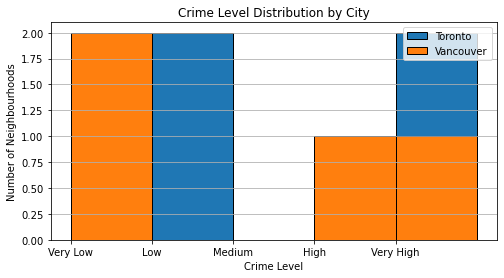

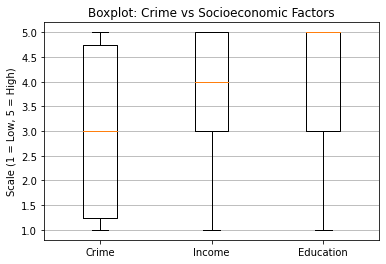

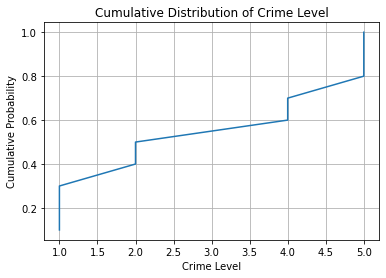

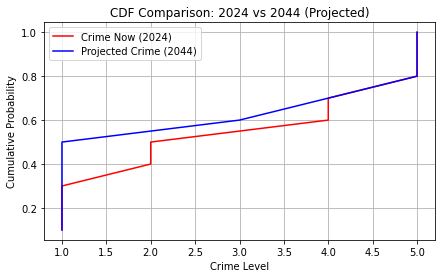

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Neighbourhood': ['Downtown Yonge East', 'West End', 'Kitsilano', 'Moss Park', 'Cabbagetown',
                      'Woodbine-Lumsden', 'Kerrisdale', 'West Point Grey', 'Bridle Path', 'Leaside'],
    'City': ['Toronto', 'Vancouver', 'Vancouver', 'Toronto', 'Toronto',
             'Toronto', 'Vancouver', 'Vancouver', 'Toronto', 'Toronto'],
    'Crime_Level': [5, 5, 4, 5, 4, 2, 1, 1, 1, 2],    
    'Income': [2, 3, 5, 1, 3, 5, 5, 4, 5, 4],         
    'Education': [3, 3, 5, 1, 3, 5, 5, 5, 5, 5]
}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 4))
for city in df['City'].unique():
    plt.hist(df[df['City'] == city]['Crime_Level'], bins=np.arange(1, 7), label=city, edgecolor='black')
plt.xticks(range(1, 6), ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel("Crime Level")
plt.ylabel("Number of Neighbourhoods")
plt.title("Crime Level Distribution by City")
plt.legend()
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot([df['Crime_Level'], df['Income'], df['Education']],
            labels=['Crime', 'Income', 'Education'])
plt.title("Boxplot: Crime vs Socioeconomic Factors")
plt.ylabel("Scale (1 = Low, 5 = High)")
plt.grid(axis='y')
plt.show()

crime_sorted = np.sort(df['Crime_Level'])
cdf = np.arange(1, len(crime_sorted)+1) / len(crime_sorted)

plt.figure(figsize=(6, 4))
plt.plot(crime_sorted, cdf)
plt.title("Cumulative Distribution of Crime Level")
plt.xlabel("Crime Level")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()


projected_crime = []
for i, row in df.iterrows():
    if row['Income'] >= 4 and row['Education'] >= 4:
        new_level = max(row['Crime_Level'] - 1, 1)  
    else:
        new_level = row['Crime_Level']
    projected_crime.append(new_level)

condition = (df['Income'] >= 4) & (df['Education'] >= 4)
df['Projected_Crime_2044'] = np.where(condition, np.maximum(df['Crime_Level'] - 1, 1), df['Crime_Level'])


sorted_now = np.sort(df['Crime_Level'])
sorted_future = np.sort(df['Projected_Crime_2044'])
cdf_now = np.arange(1, len(sorted_now)+1) / len(sorted_now)
cdf_future = np.arange(1, len(sorted_future)+1) / len(sorted_future)

plt.figure(figsize=(7, 4))
plt.plot(sorted_now, cdf_now, label='Crime Now (2024)', color='red')
plt.plot(sorted_future, cdf_future, label='Projected Crime (2044)', color='blue')
plt.title("CDF Comparison: 2024 vs 2044 (Projected)")
plt.xlabel("Crime Level")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import pandas as pd
data = {
    'Neighbourhood': ['Downtown Yonge East', 'West End', 'Kitsilano', 'Moss Park', 'Cabbagetown',
                      'Woodbine-Lumsden', 'Kerrisdale', 'West Point Grey', 'Bridle Path', 'Leaside'],
    'City': ['Toronto', 'Vancouver', 'Vancouver', 'Toronto', 'Toronto',
             'Toronto', 'Vancouver', 'Vancouver', 'Toronto', 'Toronto'],
    'Crime_Level': [5, 5, 4, 5, 4, 2, 1, 1, 1, 2],    
    'Income': [2, 3, 5, 1, 3, 5, 5, 4, 5, 4],         
    'Education': [3, 3, 5, 1, 3, 5, 5, 5, 5, 5]
}

df = pd.DataFrame(data)

grouped_means = df.groupby("City")[['Crime_Level', 'Income', 'Education']].mean()
grouped_means.reset_index()
grouped_means


,Crime_Level,Income,Education
City,,,
Toronto,3.166667,3.333333,3.666667
Vancouver,2.750000,4.250000,4.500000


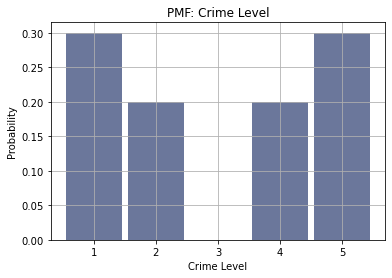

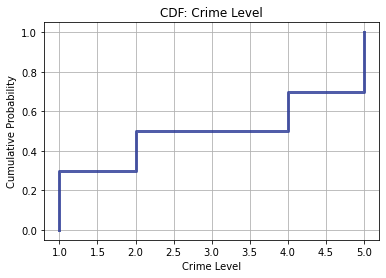

In [17]:
import thinkstats2
import thinkplot


crime_levels = [5, 5, 4, 5, 4, 2, 1, 1, 1, 2]

pmf = thinkstats2.Pmf(crime_levels, label='Crime PMF')
thinkplot.Hist(pmf)
plt.xlabel('Crime Level')              
plt.ylabel('Probability')            
plt.title('PMF: Crime Level')         
plt.grid(True)                        
plt.show()

cdf = thinkstats2.Cdf(crime_levels, label='Crime CDF')
thinkplot.Cdf(cdf)
plt.xlabel('Crime Level')              
plt.ylabel('Cumulative Probability')  
plt.title('CDF: Crime Level')          
plt.grid(True)                         
plt.show()


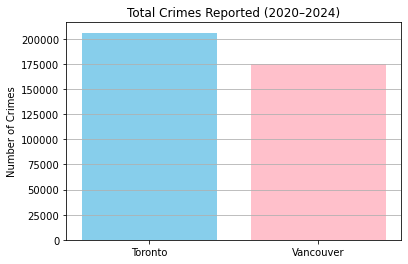

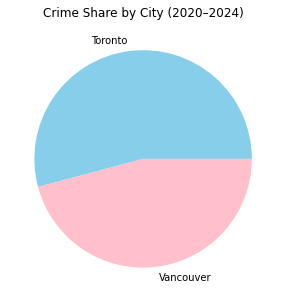

,City,Crime_Count
0,Toronto,206097
1,Vancouver,174480


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

toronto = pd.read_csv("Toronto.csv")
vancouver = pd.read_csv("VancouverFinal.csv")

toronto['OCC_DATE'] = pd.to_datetime(toronto['OCC_DATE'], errors='coerce')
toronto = toronto[(toronto['OCC_DATE'].dt.year >= 2020) & (toronto['OCC_DATE'].dt.year <= 2024)]

vancouver['DATE'] = pd.to_datetime(vancouver[['YEAR', 'MONTH', 'DAY']])
vancouver = vancouver[(vancouver['DATE'].dt.year >= 2020) & (vancouver['DATE'].dt.year <= 2024)]

toronto_count = len(toronto)
vancouver_count = len(vancouver)

crime_summary = pd.DataFrame({'City': ['Toronto', 'Vancouver'], 'Crime_Count': [toronto_count, vancouver_count]})

plt.figure(figsize=(6, 4))
plt.bar(crime_summary['City'], crime_summary['Crime_Count'], color=['skyblue', 'pink'])
plt.title('Total Crimes Reported (2020–2024)')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(crime_summary['Crime_Count'], labels=crime_summary['City'], colors=['skyblue', 'pink'])
plt.title('Crime Share by City (2020–2024)')
plt.show()

crime_summary
